In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from scipy.spatial import Voronoi, voronoi_plot_2d
import umap.umap_ as umap
from importlib import reload
import utility
reload(utility)
from utility import get_hard_disk_path

# Load data from a CSV file
data = pd.read_csv(get_hard_disk_path("Segmentation") + "statistics_features_test.csv")

Successfully loaded data from E:/data_for_seg/


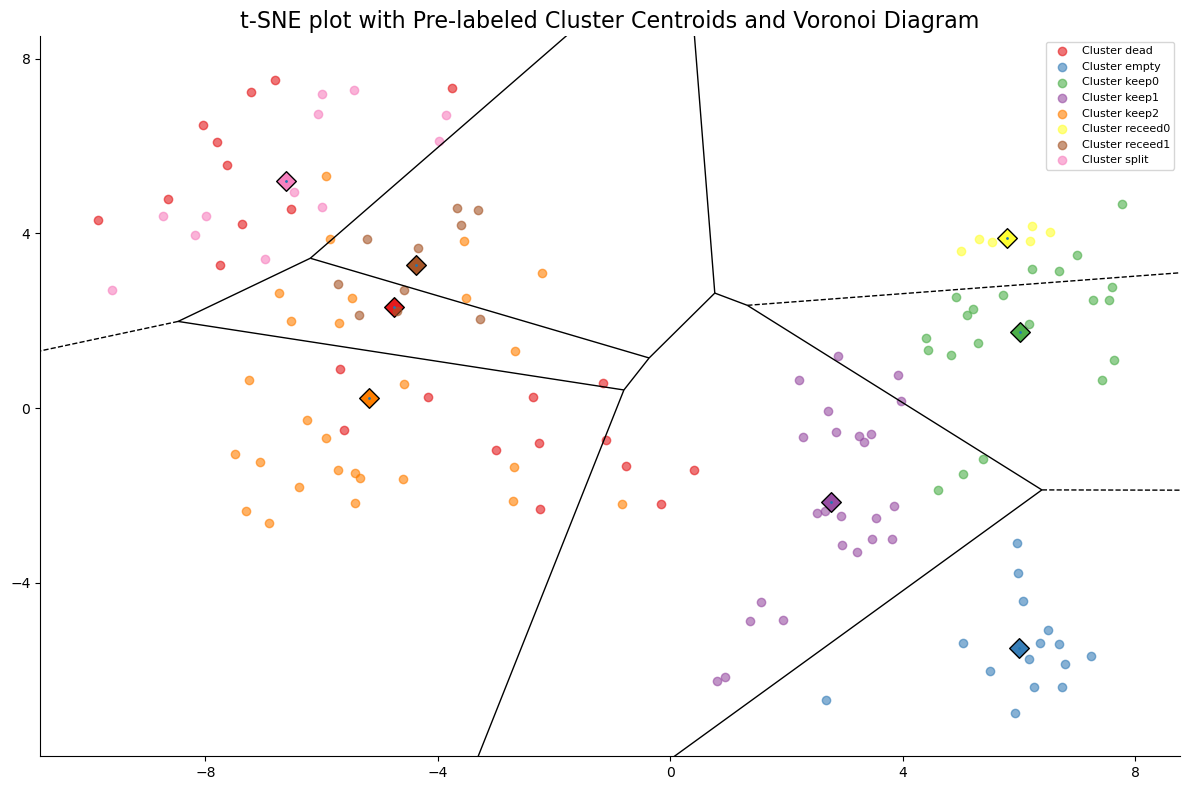

In [18]:
# Dropping the 'image_name' column as it's not needed for t-SNE
features = data.drop('image_name', axis=1)

# Saving the labels for later use in the plot
labels = features['label']

data = features.copy()

# Dropping the 'label' column to scale only numerical features
features = features.drop('label', axis=1)

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Now let's perform t-SNE on the scaled features
tsne = TSNE(n_components=2, random_state=0)  # using 2 components for a 2D plot
# The fit might take a long time, depending on the size of your dataset
tsne_results = tsne.fit_transform(features_scaled)

unique_labels = np.unique(labels)
centroids = np.array([tsne_results[labels == label].mean(axis=0) for label in unique_labels])

vor = Voronoi(centroids)

# Start plot design enhancements here
fig, ax = plt.subplots(figsize=(12, 8))  # Larger figure size

# Step 4: Plot the t-SNE points and centroids
palette = plt.cm.Set1  # A nicer color map

for i, label in enumerate(unique_labels):
    points = tsne_results[labels == label]
    centroid = centroids[i]
    color = palette(i)
    
    ax.scatter(points[:, 0], points[:, 1], color=color, alpha=0.6, label=f'Cluster {label}')
    ax.scatter(centroid[0], centroid[1], color=color, edgecolors='black', marker='D', s=100)  # Diamond-shaped centroids

# Step 5: Overlay Voronoi diagram
voronoi_plot_2d(vor, ax=ax, show_vertices=False, point_size=2)

# Enhancements
ax.set_title('t-SNE plot with Pre-labeled Cluster Centroids and Voronoi Diagram', fontsize=16)
ax.legend(fontsize=8, loc='upper right')  # Add a legend with a smaller font size

# Set axis limits to the range of t-SNE results to avoid excessive whitespace
x_min, x_max = tsne_results[:, 0].min() - 1, tsne_results[:, 0].max() + 1
y_min, y_max = tsne_results[:, 1].min() - 1, tsne_results[:, 1].max() + 1
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Hide right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Reduce number of ticks to declutter the plot
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.tight_layout()
plt.show()

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.


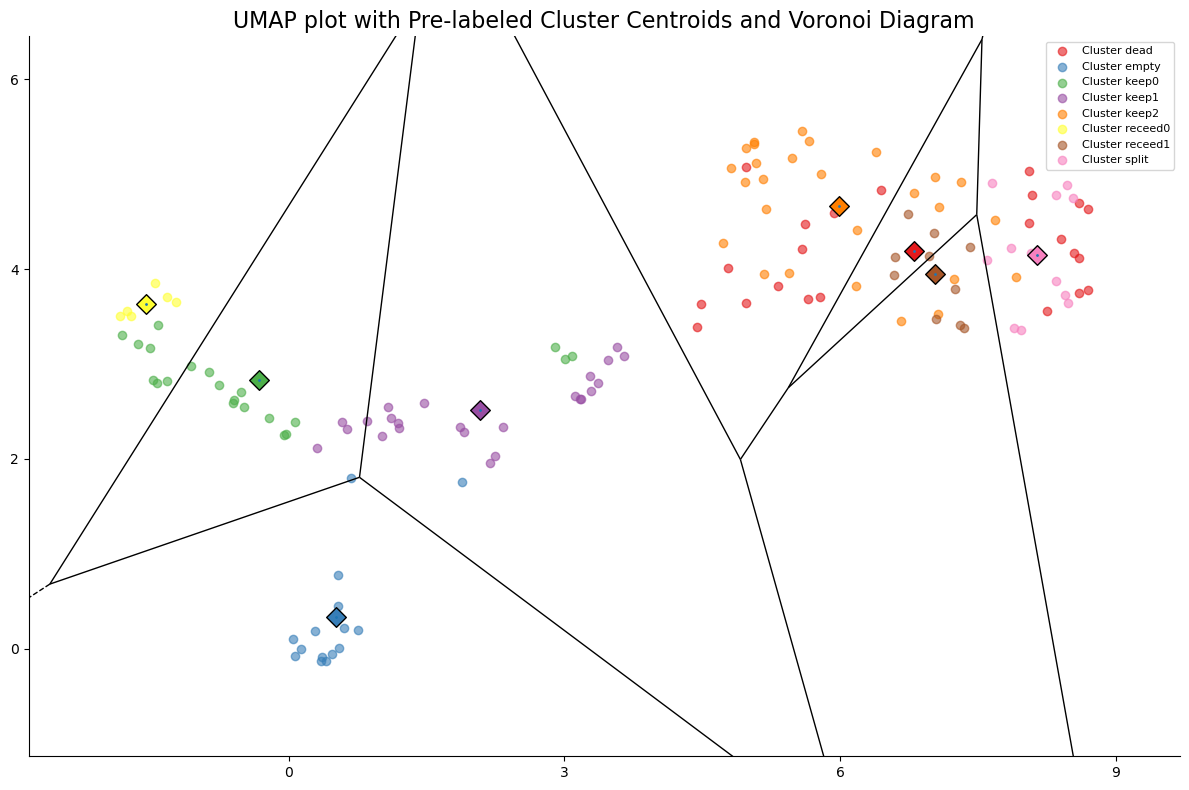

In [6]:
# Dropping the 'image_name' column as it's not needed for t-SNE
features = data.drop('image_name', axis=1)

# Saving the labels for later use in the plot
labels = features['label']

data = features.copy()

# Dropping the 'label' column to scale only numerical features
features = features.drop('label', axis=1)

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

umap_results = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42).fit_transform(features_scaled)

unique_labels = np.unique(labels)
centroids = np.array([umap_results[labels == label].mean(axis=0) for label in unique_labels])

vor = Voronoi(centroids)

# Start plot design enhancements here
fig, ax = plt.subplots(figsize=(12, 8))  # Larger figure size

# Step 4: Plot the t-SNE points and centroids
palette = plt.cm.Set1  # A nicer color map

for i, label in enumerate(unique_labels):
    points = umap_results[labels == label]
    centroid = centroids[i]
    color = palette(i)
    
    ax.scatter(points[:, 0], points[:, 1], color=color, alpha=0.6, label=f'Cluster {label}')
    ax.scatter(centroid[0], centroid[1], color=color, edgecolors='black', marker='D', s=100)  # Diamond-shaped centroids

# Step 5: Overlay Voronoi diagram
voronoi_plot_2d(vor, ax=ax, show_vertices=False, point_size=2)

# Enhancements
ax.set_title('UMAP plot with Pre-labeled Cluster Centroids and Voronoi Diagram', fontsize=16)
ax.legend(fontsize=8, loc='upper right')  # Add a legend with a smaller font size

# Set axis limits to the range of t-SNE results to avoid excessive whitespace
x_min, x_max = umap_results[:, 0].min() - 1, umap_results[:, 0].max() + 1
y_min, y_max = umap_results[:, 1].min() - 1, umap_results[:, 1].max() + 1
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Hide right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Reduce number of ticks to declutter the plot
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.tight_layout()
plt.show()